<a href="https://colab.research.google.com/github/meshalalsultan/Full_Vs_Flat_Cnn_With_TensorFlow/blob/main/Tire_Fall_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Full vs Flat Tire Images 

## Classify images of properly Filled and Underfilled Tires

The Contest and information about the data will be found here :

https://github.com/meshalalsultan/Full_Vs_Flat_Cnn_With_TensorFlow/blob/main/README.md

### Get the data throw kaggel api


I get the data throw kaggle , and split them in respect to eatch class in floder name tire_dataset.zip , witch can found in https://github.com/meshalalsultan/Full_Vs_Flat_Cnn_With_TensorFlow/blob/main/tire_dataset.zip

In [5]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("tire_dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [6]:
ls tire_dataset

test/  train/


In [7]:
ls tire_dataset/train

flat/  full/  no_tire/


In [8]:
ls tire_dataset/train/full

00000.jpg  00038.jpg  00076.jpg  00114.jpg  00152.jpg  00190.jpg  00228.jpg
00001.jpg  00039.jpg  00077.jpg  00115.jpg  00153.jpg  00191.jpg  00229.jpg
00002.jpg  00040.jpg  00078.jpg  00116.jpg  00154.jpg  00192.jpg  00230.jpg
00003.jpg  00041.jpg  00079.jpg  00117.jpg  00155.jpg  00193.jpg  00231.jpg
00004.jpg  00042.jpg  00080.jpg  00118.jpg  00156.jpg  00194.jpg  00232.jpg
00005.jpg  00043.jpg  00081.jpg  00119.jpg  00157.jpg  00195.jpg  00233.jpg
00006.jpg  00044.jpg  00082.jpg  00120.jpg  00158.jpg  00196.jpg  00234.jpg
00007.jpg  00045.jpg  00083.jpg  00121.jpg  00159.jpg  00197.jpg  00235.jpg
00008.jpg  00046.jpg  00084.jpg  00122.jpg  00160.jpg  00198.jpg  00236.jpg
00009.jpg  00047.jpg  00085.jpg  00123.jpg  00161.jpg  00199.jpg  00237.jpg
00010.jpg  00048.jpg  00086.jpg  00124.jpg  00162.jpg  00200.jpg  00238.jpg
00011.jpg  00049.jpg  00087.jpg  00125.jpg  00163.jpg  00201.jpg  00239.jpg
00012.jpg  00050.jpg  00088.jpg  00126.jpg  00164.jpg  00202.jpg  00240.jpg
00013.jpg  0

In [10]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("tire_dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'tire_dataset'.
There are 3 directories and 1 images in 'tire_dataset/train'.
There are 0 directories and 261 images in 'tire_dataset/train/flat'.
There are 0 directories and 261 images in 'tire_dataset/train/full'.
There are 0 directories and 261 images in 'tire_dataset/train/no_tire'.
There are 3 directories and 1 images in 'tire_dataset/test'.
There are 0 directories and 40 images in 'tire_dataset/test/flat'.
There are 0 directories and 40 images in 'tire_dataset/test/full'.
There are 0 directories and 40 images in 'tire_dataset/test/no_tire'.


## How many image in eatch class file 

In [11]:
# Another way to find out how many images are in a file
num_full_images_train = len(os.listdir("tire_dataset/train/full"))

num_full_images_train

261

In [12]:
num_flat_images_train = len(os.listdir("tire_dataset/train/flat"))

num_flat_images_train

261

In [13]:
num_no_tire_images_train = len(os.listdir("tire_dataset/train/no_tire"))

num_no_tire_images_train

261

## Get the class name

In [14]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("tire_dataset/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'flat' 'full' 'no_tire']


So now i have 261 image in train for eatch class , and 40 test 

## View the image and shape function

In [15]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (240, 240, 3)


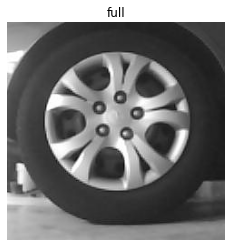

In [18]:
# View a random image from the training dataset
img = view_random_image(target_dir="tire_dataset/train/",
                        target_class="full")

# Vesualize the data

In [19]:
import matplotlib.pyplot as plt
import cv2

In [20]:
full_img = cv2.imread('/content/tire_dataset/train/full/00000.jpg')
full_img = cv2.cvtColor(full_img,cv2.COLOR_BGR2RGB)

In [21]:
#Check the type
type(full_img)

numpy.ndarray

In [22]:
full_img.shape

(240, 240, 3)

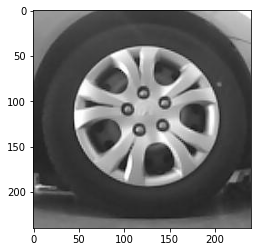

In [23]:
plt.imshow(full_img);

Check the flat image

In [25]:
flat_img = cv2.imread('/content/tire_dataset/train/flat/00004.jpg')
flat_img = cv2.cvtColor(flat_img,cv2.COLOR_BGRA2RGB)

In [26]:
#Check the type
type(full_img)

numpy.ndarray

In [27]:
full_img.shape

(240, 240, 3)

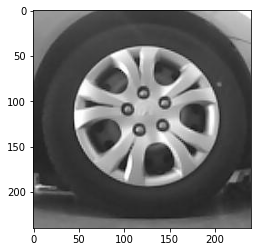

In [28]:
plt.imshow(full_img);

#Preprosess the image and generate more data 

scale the image from 0 , 1
by deviding /255

In [29]:
#Test the scale
img/255

array([[[0.53333333, 0.53333333, 0.53333333],
        [0.53333333, 0.53333333, 0.53333333],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        ...,
        [0.22745098, 0.22745098, 0.22745098],
        [0.22745098, 0.22745098, 0.22745098],
        [0.22745098, 0.22745098, 0.22745098]],

       [[0.54509804, 0.54509804, 0.54509804],
        [0.54509804, 0.54509804, 0.54509804],
        [0.54117647, 0.54117647, 0.54117647],
        ...,
        [0.22745098, 0.22745098, 0.22745098],
        [0.22745098, 0.22745098, 0.22745098],
        [0.22745098, 0.22745098, 0.22745098]],

       [[0.55294118, 0.55294118, 0.55294118],
        [0.54901961, 0.54901961, 0.54901961],
        [0.54509804, 0.54509804, 0.54509804],
        ...,
        [0.22745098, 0.22745098, 0.22745098],
        [0.22745098, 0.22745098, 0.22745098],
        [0.22745098, 0.22745098, 0.22745098]],

       ...,

       [[0.74509804, 0.74509804, 0.74509804],
        [0.74117647, 0.74117647, 0.74117647],
        [0.7372549 , 0

## Zoom , Scale , rotate ,flip , rescale

In [30]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [31]:
img_gen = ImageDataGenerator( rotation_range=30 , #rotate the image by 30%
                             width_shift_range=0.1, #shift the img width by max 10%
                             height_shift_range=0.1, #shift the img heigh bay max 10%
                             rescale=1/255, #rescale img by normalize it
                             shear_range=0.2, #cutting away part of the img as buffer 
                             zoom_range=0.2, #zoom in be 20%
                             horizontal_flip=True,
                             fill_mode='nearest')

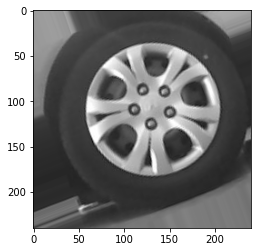

In [32]:
plt.imshow(img_gen.random_transform(full_img));

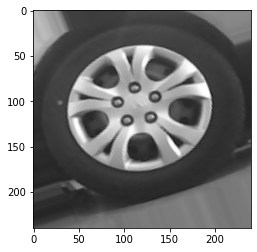

In [33]:
plt.imshow(img_gen.random_transform(full_img))

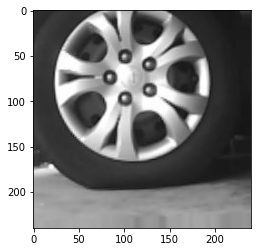

In [34]:
plt.imshow(img_gen.random_transform(flat_img))

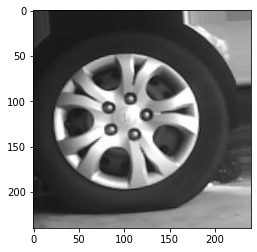

In [35]:
plt.imshow(img_gen.random_transform(flat_img));